In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',header=None,sep='\s+')

In [4]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/rinmensai/miniconda3/envs/my-rdkit-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


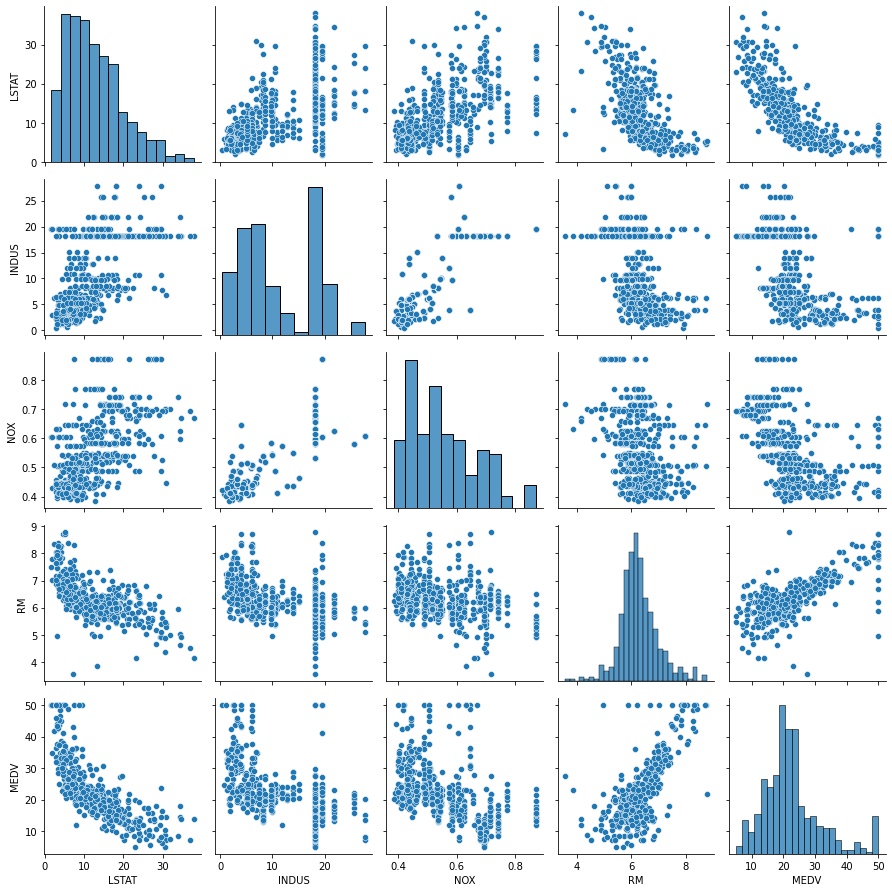

In [7]:
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],size=2.5)
plt.tight_layout()
plt.show()

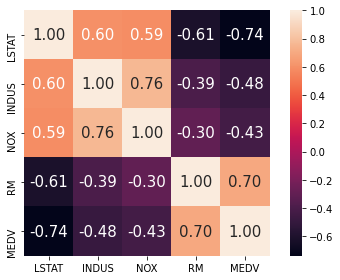

In [8]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f'%(mean_squared_error(y_train,y_train_pred),
                                     mean_squared_error(y_test,y_test_pred)))

MSE train: 19.958, test: 27.196


In [14]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f'%(r2_score(y_train,y_train_pred),
                                     r2_score(y_test,y_test_pred)))

R^2 train: 0.765, test: 0.673


In [16]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso()
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('RMSE train: %.3f, test: %.3f'%(np.sqrt(mean_squared_error(y_train,y_train_pred)),
                                     np.sqrt(mean_squared_error(y_test,y_test_pred))))



RMSE train: 4.972, test: 5.687
